In [1]:
%load_ext autoreload
%autoreload 1
%aimport redditClient

In [3]:
import networkx as nx

from redditClient import redditClient

import matplotlib.pyplot as plt

In [5]:
sFileName = "beautyGuruChatterGraph.graphml"

In [7]:
client = redditClient()
replyGraph = nx.DiGraph()
dSubCommentId = dict()
subreddit = client.subreddit('BeautyGuruChatter')

#BeautyAddiction
#BeautyGuruChatter
#Makeup
#MakeupAddiction

In [9]:
import praw
import networkx as nx

keywords = ['foundation', 'skincare', 'concealer', 'makeup', 'asian', 'western', 'racial', 'inclusive', 'brand', 'skin tone', 'range', 'diversity']

replyGraph = nx.DiGraph()
dSubCommentId = {}
post_content = dict()

for submission in subreddit.hot(limit=100):
    if any(keyword in submission.selftext.lower() for keyword in keywords):
        if submission.author is not None:
            author_name = submission.author.name
            if author_name in replyGraph:
                replyGraph.nodes[author_name]['subNum'] += 1
            else:
                replyGraph.add_node(author_name, subNum=1)

            submissionId = submission.name
            dSubCommentId[submissionId] = {submissionId: author_name}
            
            post_content[submissionId] = {
                'author': author_name,
                'title': submission.title,
                'selftext': submission.selftext,
                'type': 'submission'
            }
            
            submission.comments.replace_more(limit=None)
            for comment in submission.comments.list():
                if any(keyword in comment.body.lower() for keyword in keywords):
                    if comment.author is not None and comment.author.name != 'ExternalUserError':
                        comment_author_name = comment.author.name
                        dSubCommentId[submissionId].update({comment.name: comment_author_name})
    
                        if comment.parent_id in dSubCommentId[submissionId]:
                            parent_author = dSubCommentId[submissionId][comment.parent_id]
                            if replyGraph.has_edge(comment_author_name, parent_author):
                                replyGraph[comment_author_name][parent_author]['replyNum'] += 1
                            else:
                                if not comment_author_name in replyGraph:
                                    replyGraph.add_node(comment_author_name, subNum=0)
                                if not parent_author in replyGraph:
                                    replyGraph.add_node(parent_author, subNum=0)
                                replyGraph.add_edge(comment_author_name, parent_author, replyNum=1)
    
                            post_content[comment.name] = {
                                'author': comment_author_name,
                                'body': comment.body,
                                'type': 'comment',
                                'parent_id': comment.parent_id
                            }

nx.write_graphml(replyGraph, sFileName)

In [39]:
import community as community_louvain
import string
import re
import gensim
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

undirectedGraph = replyGraph.to_undirected()
partition = community_louvain.best_partition(undirectedGraph)

communities = {}
for node, comm_id in partition.items():
    if comm_id not in communities:
        communities[comm_id] = []
    communities[comm_id].append(node)

In [41]:
community_sizes = {comm_id: len(authors) for comm_id, authors in communities.items()}

top_5_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_ids = [comm_id for comm_id, size in top_5_communities]


Community ID: 22 - Posts:
Comment ID: t1_lremdke, Content: I’m on my third tube of Elf soft glam foundation. It’s perfect for me, 55 yo, dry to combo skin.
Submission ID: t3_1fxguag, Title: New Celeb Beauty Brand: Lily Reinhart, Content: Lily Reinhart, of Riverdale fame, is coming out with her own skincare line called Personal Day. Personal Day will launch on October 28, 2025, with five products: the Full Clarity Cleansing Powder ($24), the Even Keel Resurfacing Peel ($34), the Everybody Stay Calm Recovery Mask ($32), the Doing The Work Salicylic Acid Acne Treatment ($36) and the Dive Deep Mevalonic Moisturizer ($38).

How do we feel about ANOTHER celeb skin care line? Will this one be different?
Comment ID: t1_lqm90r8, Content: “I live in Los Angeles, and I have access to the estheticians and services in Beverly Hills that people from my hometown in Cleveland don’t have. … But really, the difference in your skin comes from what you do on a daily basis and what’s on your bathroom coun

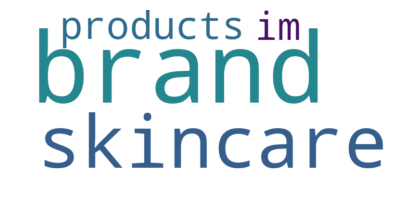

Topic 1: 0.035*"skincare" + 0.017*"makeup" + 0.014*"face" + 0.014*"brand" + 0.011*"skin"


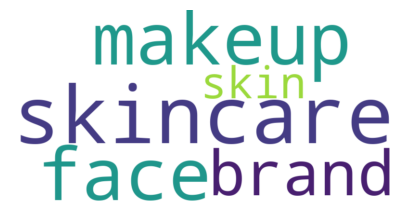

Topic 2: 0.024*"brand" + 0.023*"celebrity" + 0.020*"like" + 0.017*"lily" + 0.016*"skin"


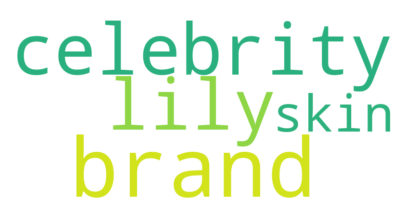


Community ID: 7 - Posts:
Submission ID: t3_1fwsuyy, Title: Devinah Cosmetics turns to AI art , Content: Devinah Cosmetics / Devinah beauty turns to AI art 

It seems another small indie (Devinah Cosmetics) has turned to AI art as “real artists couldn’t create their vision” 🤮.  The narrative seems to be this is the way of the future. I can see this doesn’t bother everyone, and may not be the consensus, but I’d love to hear thoughts. It turns my stomach to see small handmade brands turn to AI to create their vision, when smaller artists have the ability and talent to do the same. 
Comment ID: t1_lqgygm1, Content: Awful--both in execution and in philosophy. Back real artists. Especially when this kind of look could actually engage makeup artists! I mean, really, wth?
Comment ID: t1_lqgyurw, Content: Wow, they’re making some pretty dumb excuses to try validating their choice in this. Bottomline, this was lazy and I find it even more disappointing when indie brands do stuff like this becau

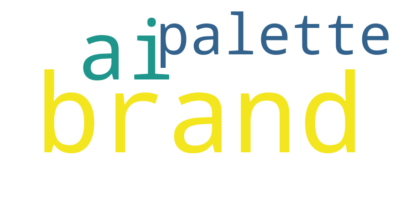

Topic 1: 0.030*"ai" + 0.022*"art" + 0.013*"brands" + 0.010*"devinah" + 0.010*"indie"


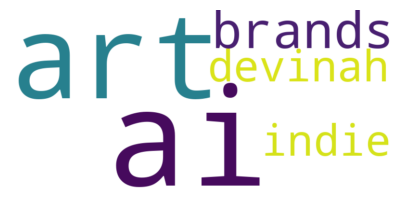

Topic 2: 0.018*"brand" + 0.014*"ai" + 0.012*"devinah" + 0.012*"outrage" + 0.010*"ensley"


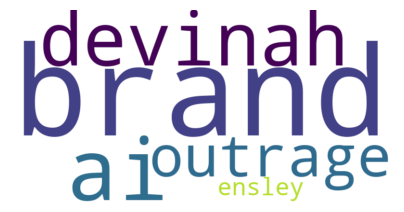


Community ID: 23 - Posts:
Comment ID: t1_ls5z6f1, Content: Doll 10 is drop ship makeup. Absolutely not the same quality at all.
Comment ID: t1_ls7933z, Content: I'm not a fan of Doll 10 after the sunscreen incident but it's not drop ship makeup. I have all of the Doll Squad palettes and they're made in Italy- very luxurious formula. I did try their stuff years ago from QVC and wasn't impressed but recently the formulas have been really solid. I use the Doll Squad palettes more than a lot of my high end palettes and that's saying something.
Comment ID: t1_ls91x1y, Content: I don’t want to argue with you. Just because something is drop shipped doesn’t mean it’s made in China. I have met Doris and had a lot of her makeup before. I do not care for it at all.
Submission ID: t3_1fztlgh, Title: What happened to drugstore makeup - Discussion , Content: [https://www.youtube.com/watch?v=-Y05UPKqqfU](https://www.youtube.com/watch?v=-Y05UPKqqfU)

Kelly Gooch recently posted a video about what's h

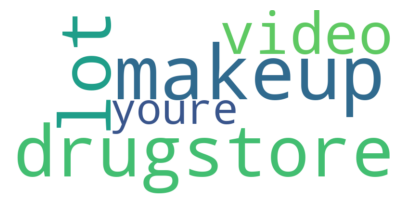

Topic 1: 0.014*"lol" + 0.010*"products" + 0.010*"covergirl" + 0.010*"tbh" + 0.010*"bad"


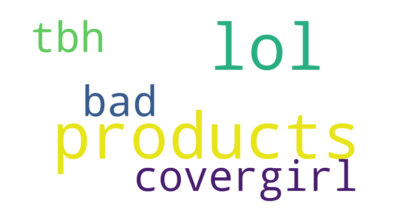

Topic 2: 0.027*"drugstore" + 0.017*"makeup" + 0.015*"products" + 0.014*"buy" + 0.010*"like"


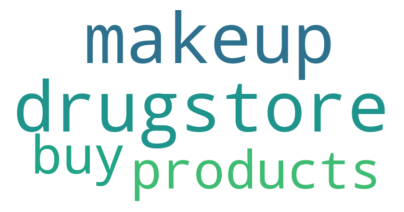


Community ID: 25 - Posts:
Submission ID: t3_1fvjgmq, Title: Ulta is now doing “mini brands” eggs. Similar to the kinder surprise eggs you used to get as a kid, but with makeup and skincare in them. (It’s 9.99 for one egg.) , Content: So basically, for 9.99 dollars you get a hunch of minis that aren’t even gonna last at all in your collection. For 9.99 I can get two drugstore products that are full sized and will be more usable than these minis. Who told ulta that its costumer base wanted to feel like kids again? Lol. 

At least these minis can solve the Sephora kids problem, right? Just get them one of these eggs instead of the real, full sized makeup and skincare for grown ups, that they don’t even know what it’s used for yet, lol. 
Comment ID: t1_lq7kht0, Content: Adding this in case others aren't familiar with Mini Brands and assume these are actual minis, but these do not actually have product in them or are functional in any way. They have detachable and articulated parts that re

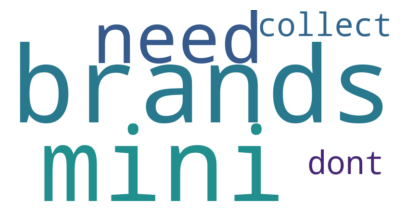

Topic 1: 0.028*"mini" + 0.018*"makeup" + 0.016*"product" + 0.015*"waste" + 0.015*"plastic"


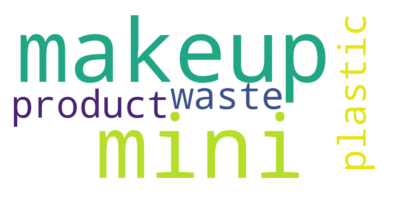

Topic 2: 0.029*"mini" + 0.020*"brand" + 0.016*"brands" + 0.015*"like" + 0.015*"makeup"


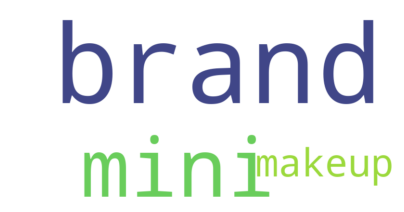


Community ID: 5 - Posts:
Comment ID: t1_lskgqtk, Content: See, for me, the new foundation made it into one of my top three at the moment.   Truly ymwv, right?
Comment ID: t1_lsksjjh, Content: I love the new foundation and primer
Submission ID: t3_1g6qt78, Title: Dieverune - Unethical Brand!❌, Content: Monica, the Brand Owner of Dieverune Cosmetics selling the new launched makeup palettes to Chinese local resellers with 30-40% price off, then the resellers selling the palettes before the launch and with much lower price than we paid from USA and Europe. 
When I asked Monica, she said that’s a great thing to do and totally ignore how the customers in US and Europe feel, plus encourage the customers outside China (including US and Europe) buying her new palettes from Chinese local resellers directly instead of buying stuff from her website. Even after I told her they can sell counterfeit products (obviously she doesn’t care). 
Gross attitude, and I read she was a bully back then but didn

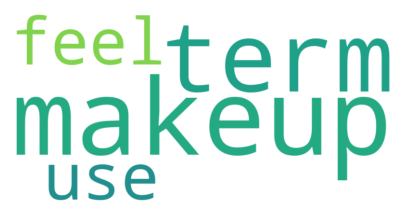

Topic 1: 0.020*"dont" + 0.017*"like" + 0.015*"im" + 0.013*"makeup" + 0.010*"bb"


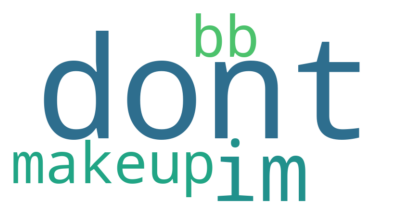

Topic 2: 0.021*"brand" + 0.014*"collabs" + 0.014*"bunny" + 0.014*"blend" + 0.014*"new"


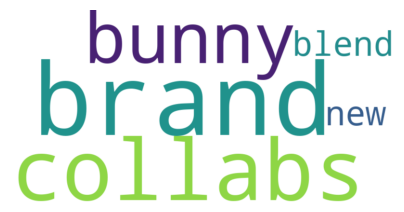

Largest Communities:
Community ID: 22, Community Size: 32
Community ID: 7, Community Size: 26
Community ID: 23, Community Size: 24
Community ID: 25, Community Size: 24
Community ID: 5, Community Size: 23


In [45]:
stop_words = set(gensim.parsing.preprocessing.STOPWORDS)

def clean_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans("", "", string.punctuation)) 
    text = re.sub(r'\d+', '', text) 
    text = ' '.join(text.split())  
    return text

for comm_id in top_5_ids:
    authors = communities[comm_id]
    texts = []
    
    print(f"\nCommunity ID: {comm_id} - Posts:")
    
    for post_id, post_data in post_content.items():
        if post_data['author'] in authors:
            if post_data['type'] == 'submission':
                combined_text = post_data['title'] + ' ' + post_data.get('selftext', '')
                print(f"Submission ID: {post_id}, Title: {post_data['title']}, Content: {post_data.get('selftext', '')}")
                cleaned_text = clean_text(combined_text)
                if cleaned_text:
                    texts.append(cleaned_text)
            elif post_data['type'] == 'comment':
                combined_text = post_data.get('body', '')
                print(f"Comment ID: {post_id}, Content: {combined_text}")
                cleaned_text = clean_text(combined_text)
                if cleaned_text:
                    texts.append(cleaned_text)

    if texts:
        tokenized_texts = [
            [word for word in gensim.utils.simple_preprocess(text) if word not in stop_words]
            for text in texts
        ]
        
        dictionary = corpora.Dictionary(tokenized_texts)
        corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

        num_topics = 3  
        lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

        print(f"Community ID: {comm_id} - Top topics:")
        for idx, topic in lda_model.print_topics(num_words=5):
            print(f"Topic {idx}: {topic}")
            
            words = topic.split('"')
            topic_words = [words[i] for i in range(1, len(words), 2)]  
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic_words))

            plt.figure(figsize=(5, 2.5))
            plt.imshow(wordcloud, interpolation='bilinear')  
            plt.axis('off') 
            plt.show()  

print("Largest Communities:")
for comm_id, size in top_5_communities: 
    print(f"Community ID: {comm_id}, Community Size: {size}")